#  Imports and Read in One Map

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

In [2]:
from projections import transform_map

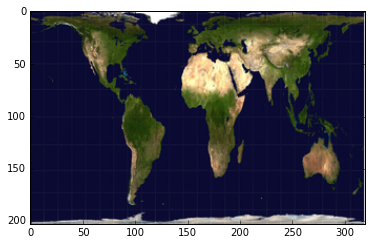

In [3]:
map1 = misc.imread('/Users/pfoley/map_projections/input_images/Gall-peters_smallest.png')
map2 = misc.imread('/Users/pfoley/map_projections/input_images/plate_carre_1.jpg')
plt.imshow(map1)

In [3]:
bigmap = misc.imread('/Users/pfoley/nasa_world_july_5400x2700.png')

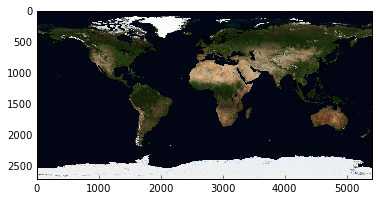

In [4]:
plt.imshow(bigmap)

#  Example Transformation

In [5]:
from projections import rotationFromXYZ

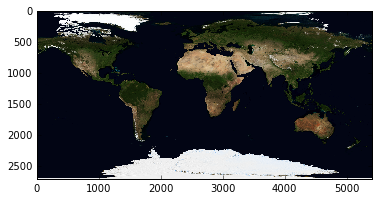

In [6]:
map1b = transform_map(bigmap, rotationFromXYZ(0.0, 0.2, 0.2), 
		     in_projection='platecarre', out_projection='platecarre')

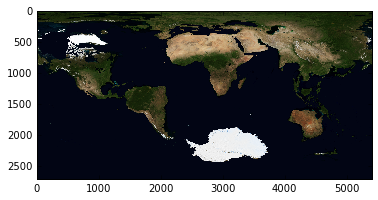

In [7]:
map1c = transform_map(bigmap, rotationFromXYZ(-0.3, 0.5, 0.2), 
		     in_projection='platecarre', out_projection='platecarre')

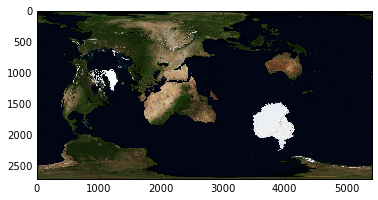

In [8]:
map1c = transform_map(bigmap, rotationFromXYZ(-0.9, -0.5, 0.6), 
		     in_projection='platecarre', out_projection='platecarre')

##  New Rotation Code

I just finished some code to get rotations to place two locations as front and center.  Let's try it out.

First let's do SF to Melbourne.

37.7749° N, 122.4194° W
37.8136° S, 144.9631° E

In [24]:
san_francisco = (-122.4194, 37.7749)
melbourne = (144.9631, -37.8136)
seoul = (126.9780, 37.5665)
beijing = (116.4074, 39.9042)
lagos = (3.3792, 6.5244)
buenos_aires = (-58.3816, -34.6037)
helsinki = (24.9384, 60.1699)

In [25]:
san_francisco = tuple([d * np.pi / 180.0 for d in san_francisco])
melbourne = tuple([d * np.pi / 180.0 for d in melbourne])
seoul = tuple([d * np.pi / 180.0 for d in seoul])
beijing = tuple([d * np.pi / 180.0 for d in beijing])
lagos = tuple([d * np.pi / 180.0 for d in lagos])
buenos_aires = tuple([d * np.pi / 180.0 for d in buenos_aires])
helsinki = tuple([d * np.pi / 180.0 for d in helsinki])

In [26]:
from projections import rotationFromTwoLocations

Now let's use a large plate carre image.

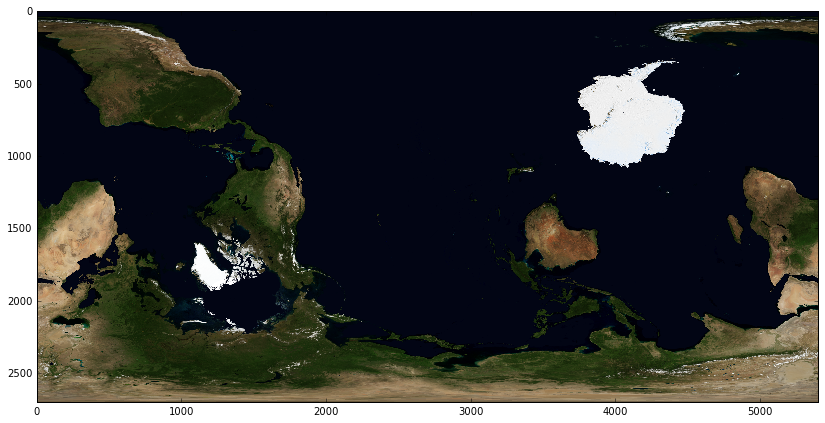

In [48]:
large_sf_to_melbourne = transform_map(bigmap,
                                      rotationFromTwoLocations(san_francisco, melbourne),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(large_sf_to_melbourne)
misc.imsave('/Users/pfoley/sf_to_melbourne.png', large_sf_to_melbourne)

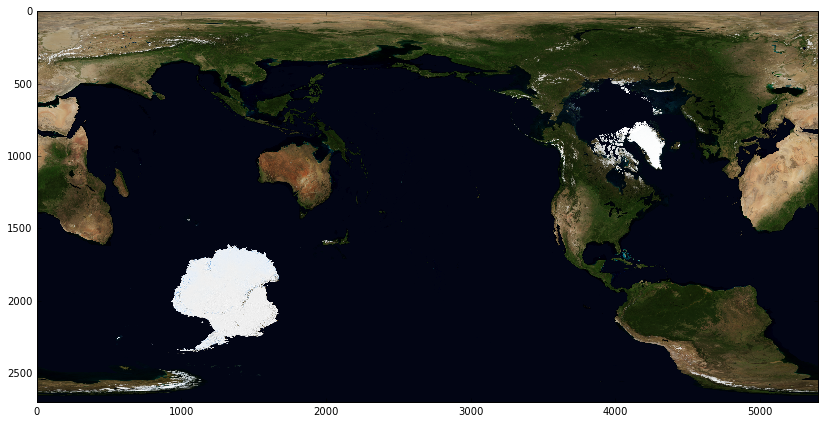

In [50]:
large_melbourne_to_sf = transform_map(bigmap,
                                      rotationFromTwoLocations(melbourne, san_francisco),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(large_melbourne_to_sf)
misc.imsave('/Users/pfoley/melbourne_to_sf.png', large_melbourne_to_sf)

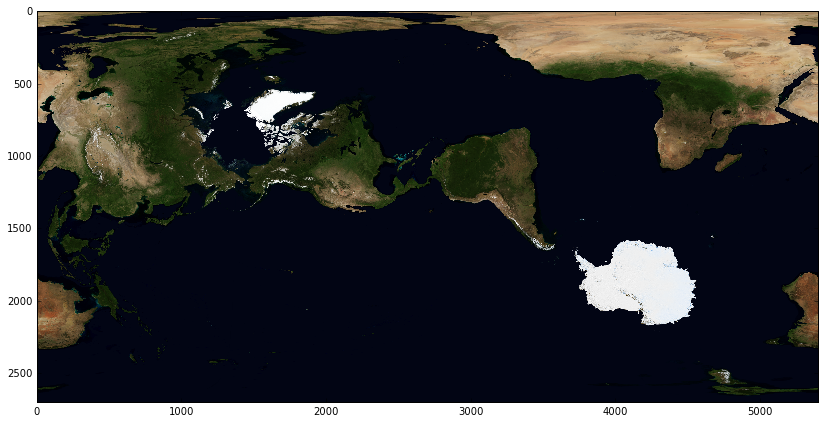

In [53]:
large_sf_to_buenos_aires = transform_map(bigmap,
                                      rotationFromTwoLocations(san_francisco, buenos_aires),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(large_sf_to_buenos_aires)
misc.imsave('/Users/pfoley/large_sf_to_buenos_aires.png', large_sf_to_buenos_aires)

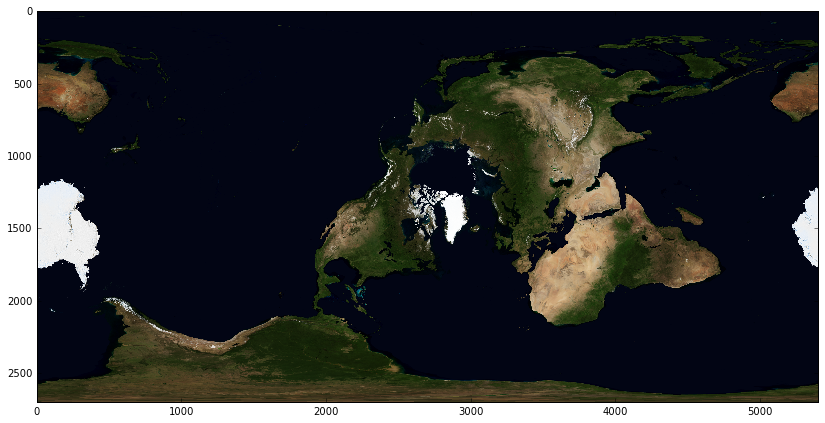

In [54]:
large_sf_to_helsinki = transform_map(bigmap,
                                      rotationFromTwoLocations(san_francisco, helsinki),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(large_sf_to_helsinki)
misc.imsave('/Users/pfoley/large_sf_to_helsinki.png', large_sf_to_helsinki)

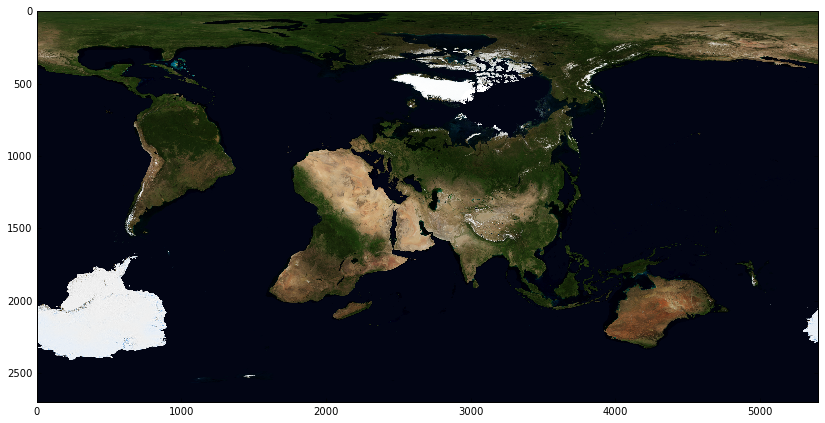

In [55]:
large_lagos_to_beijing = transform_map(bigmap,
                                      rotationFromTwoLocations(lagos, beijing),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(large_lagos_to_beijing)
misc.imsave('/Users/pfoley/large_lagos_to_beijing.png', large_lagos_to_beijing)

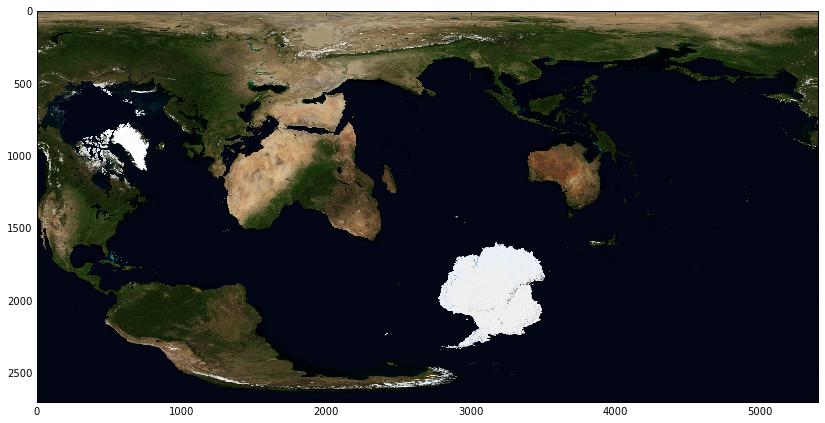

In [69]:
large_lagos_to_melbourne = transform_map(bigmap,
                                      rotationFromTwoLocations(lagos, melbourne),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(large_lagos_to_melbourne)
misc.imsave('/Users/pfoley/large_lagos_to_melbourne.png', large_lagos_to_melbourne)

#  Check Speed

In [27]:
%%timeit
map3 = transform_map(map2,
                     sf_to_melbourne,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     display=False,
                     debug=False)

10 loops, best of 3: 75.2 ms per loop


In [28]:
%%timeit
map3 = transform_map(map2,
                     melbourne_to_sf,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     display=False,
                     debug=False)

10 loops, best of 3: 74.9 ms per loop


10 loops, best of 3: 86.7 ms per loop


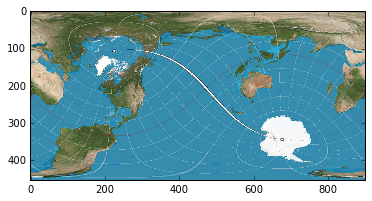

In [29]:
%%timeit
map3 = transform_map(map2,
                     sf_to_melbourne,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

Looks like it's about 75 milliseconds. 

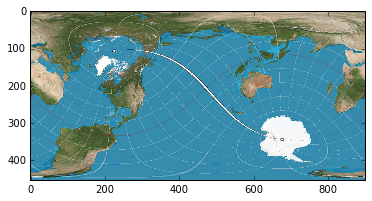

In [31]:
map3 = transform_map(map2,
                     sf_to_melbourne,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

Let's speed test after getting rid of that artifact.

In [32]:
july_sat = misc.imread('/Users/pfoley/map_projections/input_images/nasa_world_july_5400x2700.jpg')

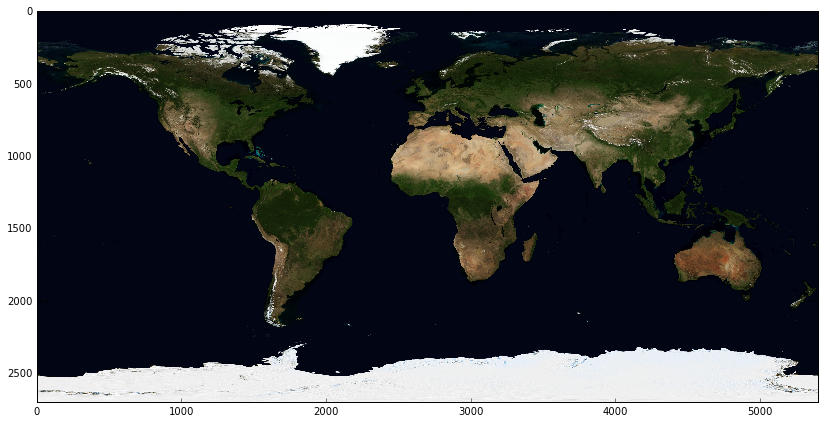

In [40]:
plt.figure(figsize=(14,10))
plt.imshow(july_sat)

In [44]:
%%timeit
map3 = transform_map(july_sat,
                     sf_to_melbourne,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     display=False,
                     debug=False)

1 loop, best of 3: 3.92 s per loop


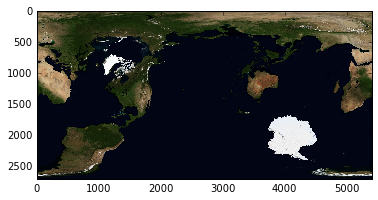

In [45]:
map_timed = transform_map(july_sat,
                     sf_to_melbourne,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

In [46]:
misc.imsave('check_resolution_4seconds.jpg', map_timed)

In [47]:
map_timed.shape

(2700, 5400, 3)

In [48]:
map_timed.dtype

dtype('uint8')

In [50]:
%%timeit
test = np.zeros(dtype = 'uint8', shape = (2700, 5400, 3))

100 loops, best of 3: 8.96 ms per loop


In [52]:
from copy import deepcopy

In [53]:
%%timeit
test = deepcopy(map_timed)

100 loops, best of 3: 11.1 ms per loop


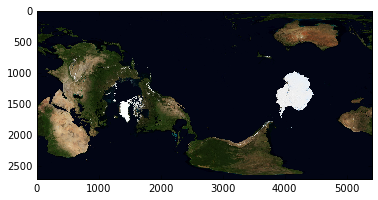

In [61]:
map_sf2seoul = transform_map(july_sat,
                     seoul_to_sf.T,
                     in_projection='platecarre',
                     out_projection='platecarre',
                     debug=False)

# Debug

It looks like I can't get SF to Seoul for some reason.  Let's debug.  

First - is my basic longitude / latitude part from the very start OK?  Or am I off by some pi or something?

In [8]:
map2.shape

(453, 900, 3)

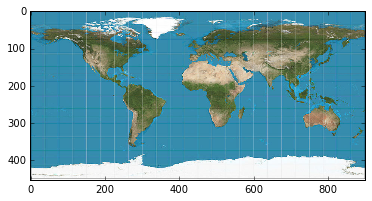

In [9]:
plt.imshow(map2)

OK, let's try my latitude longitude function for an x of about 450, and a y of around 100.  should be near the UK.

In [10]:
from projections import longitudeAndLatitudeFromPCPixel

In [11]:
myloc = longitudeAndLatitudeFromPCPixel(450, 100, (900, 453))

In [12]:
np.array(list(myloc)) * (180.0 / np.pi)

array([  0.        ,  50.26490066])

It looks like I am flipping things.

OK great I fixed it!  Now I'm not fipping things.

###  XYZ Debug

Now, before working on rotations, let me check if I have the right x, y, and z.

In [13]:
from projections import spatialCoordinatesFromLongitudeAndLatitude

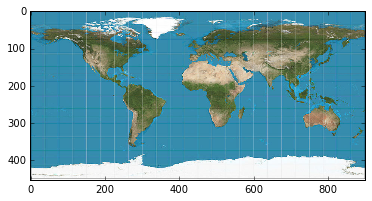

In [14]:
plt.imshow(map2)

In [16]:
spatialCoordinatesFromLongitudeAndLatitude(
    *longitudeAndLatitudeFromPCPixel(
        450, 100, (900, 453)))

(0.63923903103344193, 0.0, 0.76900810217020876)

OK, cool, that place in France looks like mostly x and some z, but then no y, which is great.  Now let me try to get a vector that's mostly y.

In [17]:
spatialCoordinatesFromLongitudeAndLatitude(
    *longitudeAndLatitudeFromPCPixel(
        725, 250, (900, 453)))

(-0.33748804546167965, 0.92724078424183998, -0.16225395899340278)

Now let me rotate it a bit around X and then a bit around Z.

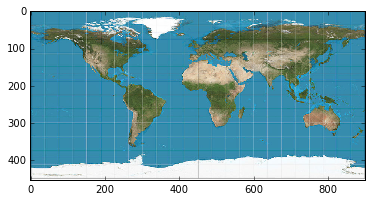

In [18]:
map2b = transform_map(map2, rotationFromXYZ(0.0, 0.0, 0.0), 
        in_projection='platecarre', out_projection='platecarre', debug=False)

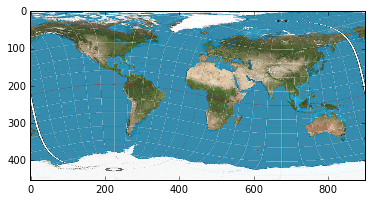

In [20]:
map2b = transform_map(map2, rotationFromXYZ(0.2, 0.0, 0.0), 
        in_projection='platecarre', out_projection='platecarre', debug=False)

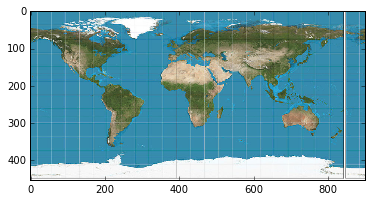

In [22]:
map2b = transform_map(map2, rotationFromXYZ(0.0, 0.0, 0.4), 
        in_projection='platecarre', out_projection='platecarre', debug=False)

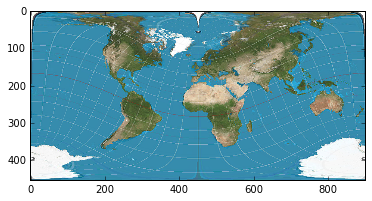

In [25]:
map2b = transform_map(map2, rotationFromXYZ(0.0, -0.4, 0.0), 
        in_projection='platecarre', out_projection='platecarre', debug=False)

OK, all looks good.  Now let me try to do a rotation from place to place. 

#  Small Rotation Maps

In [70]:
bigwintermap = misc.imread('/Users/pfoley/nasa_earth_december5400x2700.png')

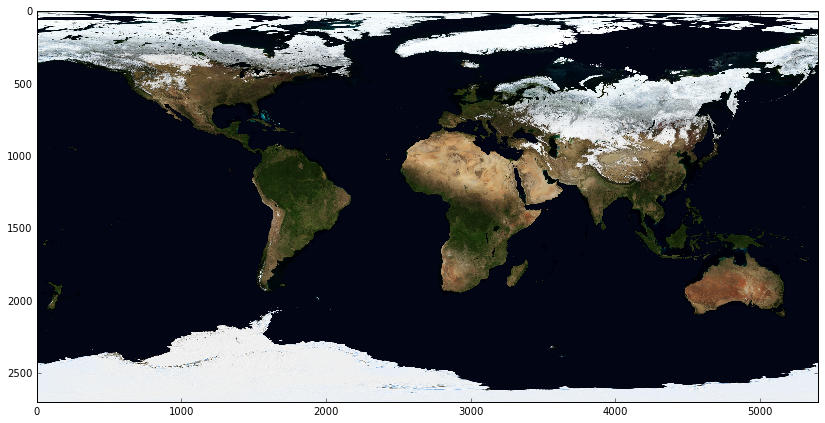

In [63]:
smallxplus = transform_map(bigwintermap,
                                      rotationFromXYZ(0.30, 0.0, 0.0),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(smallxplus)
misc.imsave('/Users/pfoley/smallxplus.png', smallxplus)

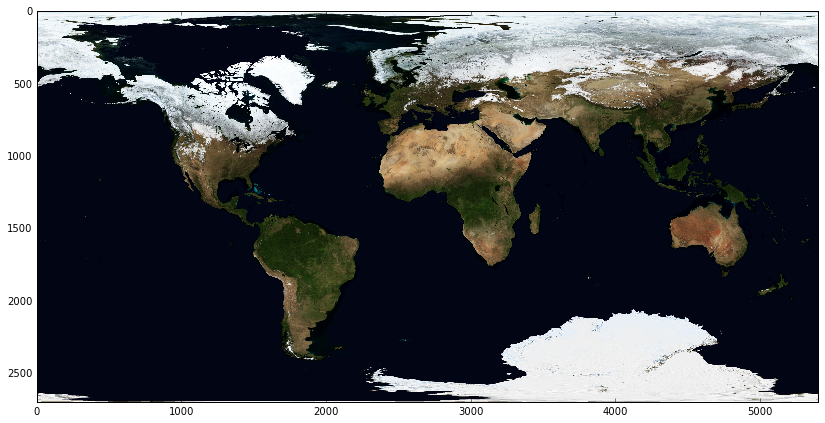

In [64]:
smallxminus = transform_map(bigwintermap,
                                      rotationFromXYZ(-0.30, 0.0, 0.0),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(smallxminus)
misc.imsave('/Users/pfoley/smallxminus.png', smallxminus)

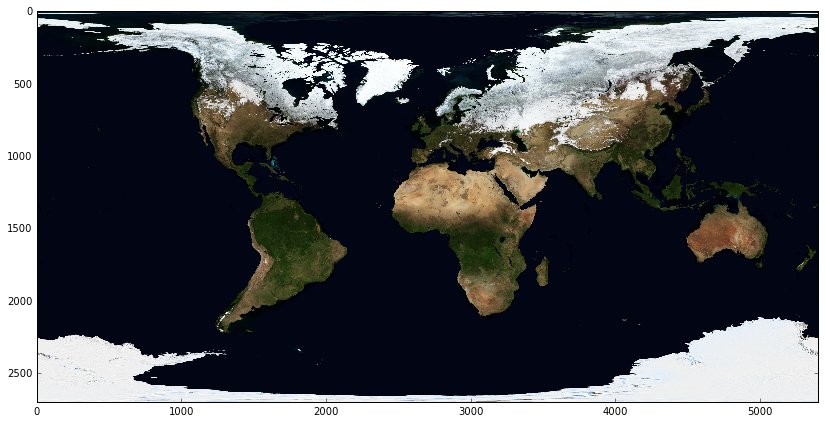

In [65]:
smallyminus = transform_map(bigwintermap,
                                      rotationFromXYZ(0.0, -0.30, 0.0),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(smallyminus)
misc.imsave('/Users/pfoley/smallyminus.png', smallyminus)

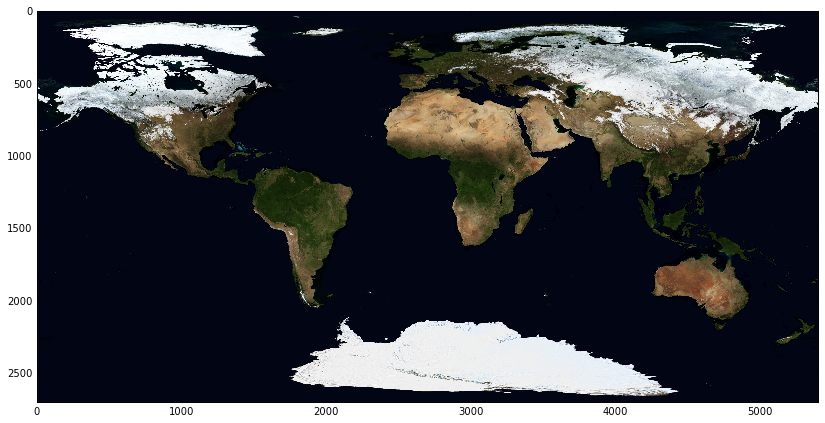

In [66]:
smallyplus = transform_map(bigwintermap,
                                      rotationFromXYZ(0.0, 0.30, 0.0),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(smallyplus)
misc.imsave('/Users/pfoley/smallyplus.png', smallyplus)

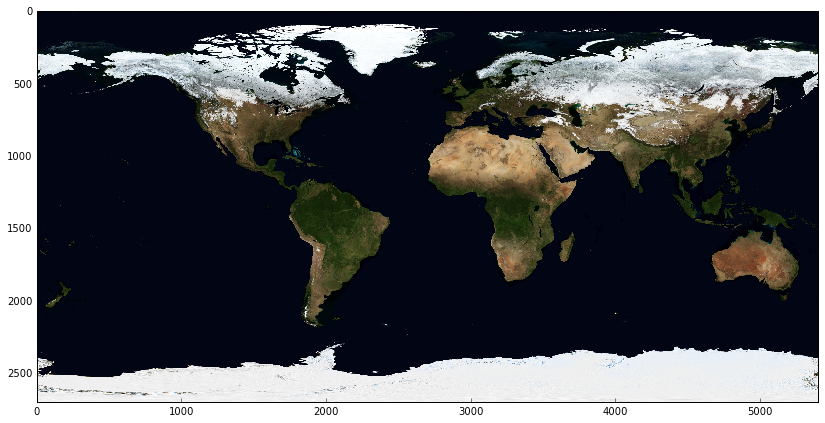

In [67]:
smallzminus = transform_map(bigwintermap,
                                      rotationFromXYZ(0.0, 0.0, -0.30),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(smallzminus)
misc.imsave('/Users/pfoley/smallzminus.png', smallzminus)

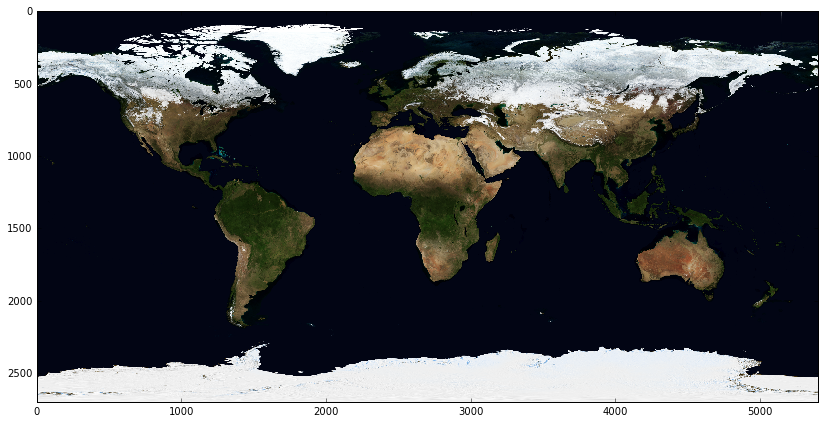

In [68]:
smallzplus = transform_map(bigwintermap,
                                      rotationFromXYZ(0.0, 0.0, 0.30),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(smallzplus)
misc.imsave('/Users/pfoley/smallzplus.png', smallzplus)

## More Rotation images

In [73]:
for i in range(10):
    map_name = '/Users/pfoley/small_x_rotation' + str(i) + '.png'
    xrot_map = transform_map(bigwintermap,
                             rotationFromXYZ((1.0*i / 10.0)*2.0*np.pi, 0.0, 0.0),
                             in_projection='platecarre',
                             out_projection='platecarre',
                             display=False, debug=False)
    misc.imsave(map_name, xrot_map)

In [74]:
for i in range(10):
    map_name = '/Users/pfoley/small_y_rotation' + str(i) + '.png'
    yrot_map = transform_map(bigwintermap,
                             rotationFromXYZ(0.0, (1.0*i / 10.0)*2.0*np.pi, 0.0),
                             in_projection='platecarre',
                             out_projection='platecarre',
                             display=False, debug=False)
    misc.imsave(map_name, yrot_map)

In [75]:
for i in range(10):
    map_name = '/Users/pfoley/small_z_rotation' + str(i) + '.png'
    zrot_map = transform_map(bigwintermap,
                             rotationFromXYZ(0.0, 0.0, (1.0*i / 10.0)*2.0*np.pi),
                             in_projection='platecarre',
                             out_projection='platecarre',
                             display=False, debug=False)
    misc.imsave(map_name, zrot_map)

In [76]:
for i in range(40):
    map_name = '/Users/pfoley/lots_of_y_rotations' + str(i) + '.png'
    yrot_map = transform_map(bigwintermap,
                             rotationFromXYZ(0.0, (1.0*i / 40.0)*2.0*np.pi, 0.0),
                             in_projection='platecarre',
                             out_projection='platecarre',
                             display=False, debug=False)
    misc.imsave(map_name, yrot_map)

In [77]:
for i in range(50):
    map_name = '/Users/pfoley/lots_of_x_rotations' + str(i) + '.png'
    xrot_map = transform_map(bigwintermap,
                             rotationFromXYZ((1.0*i / 50.0)*2.0*np.pi, 0.0, 0.0),
                             in_projection='platecarre',
                             out_projection='platecarre',
                             display=False, debug=False)
    misc.imsave(map_name, xrot_map)

projections.py:141: RuntimeWarning: invalid value encountered in arcsin
  latitude = np.arcsin(zzs)


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 2700